## Pandas

A library to work with dataframes

In [1]:
import pandas as pd

#### To create a dataframe

In [2]:
data = {
    "name": ["Анна", "Мария", "Софья", "Сидни", "Ксения", "Наталья", "Татьяна", "Александра", "Иван", "Аиша", "Александр", "Анна", "Рахмат", "Алексей", "Анна", "Анна", "Ваньшу"],
    "balloons": [25, 14, 34, 78, 16, 50, 27, 38, 43, 17, 34, 7, 89, 56, 13, 12, 50]
}

df = pd.DataFrame(data)
df

,name,balloons
0,Анна,25
1,Мария,14
2,Софья,34
3,Сидни,78
4,Ксения,16
5,Наталья,50
6,Татьяна,27
7,Александра,38
8,Иван,43
9,Аиша,17


In [3]:
data = [
    {"name": "Анна", "balloons": 25},
    {"name": "Сидни", "balloons": 14},
    {"name": "Наталья", "balloons": 34},
    {"name": "Александр", "balloons": 78}
]

df = pd.DataFrame(data)
df

,name,balloons
0,Анна,25
1,Сидни,14
2,Наталья,34
3,Александр,78


In [4]:
data = [["Рахмат", 25], ["Ваньшу", 14], ["Ксения", 34], ["Аиша", 78]]

df = pd.DataFrame(data, columns=["name", "balloons"])
df

,name,balloons
0,Рахмат,25
1,Ваньшу,14
2,Ксения,34
3,Аиша,78


#### Reading the data

In [ ]:
df = pd.read_csv("data/example.csv", sep="\t")  # separator -- a tab
df

In [ ]:
df = pd.read_excel("data/example.xlsx", sheet_name="example")
df

In [6]:
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")[0]
df.head()

,Unnamed: 0,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations),Unnamed: 6
0,–,World,8065110000,100%,12 Oct 2023,UN projection[3],NaN
1,1,China,1411750000,NaN,31 Dec 2022,Official estimate[4],[b]
2,2,India,1392329000,NaN,1 Mar 2023,Official projection[5],[c]
3,3,United States,335499000,NaN,12 Oct 2023,National population clock[7],[d]
4,4,Indonesia,278696200,NaN,1 Jul 2023,National annual projection[8],NaN


In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/cldf-datasets/wals/master/raw/country.csv")

In [8]:
df.head()

,pk,jsondata,id,name,description,markup_description,continent
0,1,NaN,AF,Afghanistan,NaN,NaN,Asia
1,2,NaN,AL,Albania,NaN,NaN,Europe
2,3,NaN,DZ,Algeria,NaN,NaN,Africa
3,4,NaN,AS,American Samoa,NaN,NaN,Australia & Oceania
4,5,NaN,AO,Angola,NaN,NaN,Africa


#### Saving the data

In [ ]:
df.to_csv("wals_country.csv", index=None)

#### Manipulating the data

In [9]:
df = df.drop(["jsondata", "description"], axis=1) # to delete columns

# testing
df.head(2)

,pk,id,name,markup_description,continent
0,1,AF,Afghanistan,NaN,Asia
1,2,AL,Albania,NaN,Europe


In [10]:
df.dropna() # deleting na

,pk,id,name,markup_description,continent


In [11]:
df.shape, df.dropna().shape # the shape of the dataframe: rows, columns

((192, 5), (0, 5))

In [12]:
df.dropna(how="all", axis=1).head() # deleting columns, where all the values are empty

,pk,id,name,continent
0,1,AF,Afghanistan,Asia
1,2,AL,Albania,Europe
2,3,DZ,Algeria,Africa
3,4,AS,American Samoa,Australia & Oceania
4,5,AO,Angola,Africa


In [13]:
df = df[["pk", "id", "name", "continent"]] # selecting columns

In [14]:
df.head()

,pk,id,name,continent
0,1,AF,Afghanistan,Asia
1,2,AL,Albania,Europe
2,3,DZ,Algeria,Africa
3,4,AS,American Samoa,Australia & Oceania
4,5,AO,Angola,Africa


In [15]:
df[df["pk"] < 4] # selecting values in the pk-column that are less than 4

,pk,id,name,continent
0,1,AF,Afghanistan,Asia
1,2,AL,Albania,Europe
2,3,DZ,Algeria,Africa


In [16]:
df["continent"].value_counts() # counting the values

Africa                 54
Asia                   46
Europe                 38
Australia & Oceania    22
North America          17
South America          13
Eurasia                 2
Name: continent, dtype: int64

In [17]:
df[df["continent"] == "North America"]

,pk,id,name,continent
14,15,BZ,Belize,North America
26,27,CA,Canada,North America
34,35,CR,Costa Rica,North America
42,43,DM,Dominica,North America
46,47,SV,El Salvador,North America
63,64,GD,Grenada,North America
66,67,GT,Guatemala,North America
70,71,HT,Haiti,North America
71,72,HN,Honduras,North America
81,82,JM,Jamaica,North America


In [18]:
df[df["continent"] == "North America"].sort_values(by="id")

,pk,id,name,continent
120,121,AN,Netherlands Antilles,North America
14,15,BZ,Belize,North America
26,27,CA,Canada,North America
34,35,CR,Costa Rica,North America
42,43,DM,Dominica,North America
63,64,GD,Grenada,North America
66,67,GT,Guatemala,North America
71,72,HN,Honduras,North America
70,71,HT,Haiti,North America
81,82,JM,Jamaica,North America


In [19]:
df.groupby("continent").agg({"name": list}) # grouping by continent and making lists of countries

,name
continent,
Africa,"[Algeria, Angola, Benin, Botswana, Burkina Fas..."
Asia,"[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba..."
Australia & Oceania,"[American Samoa, Australia, Fiji, French Polyn..."
Eurasia,"[Russia, Turkey]"
Europe,"[Albania, Austria, Belarus, Belgium, Bosnia-He..."
North America,"[Belize, Canada, Costa Rica, Dominica, El Salv..."
South America,"[Argentina, Bolivia, Brazil, Chile, Colombia, ..."


In [20]:
df.groupby("continent").agg({"pk": "mean"}) # computing the mean

,pk
continent,
Africa,94.703704
Asia,104.195652
Australia & Oceania,113.909091
Eurasia,159.500000
Europe,85.921053
North America,88.235294
South America,79.307692


We can apply functions to the values in columns, for example, reduplicate the text in the id-column:

In [21]:
def change_id(text):
    if type(text) == str:
        text = text.lower() * 2
    return text

In [ ]:
df["id"].apply(change_id)

0      afaf
1      alal
2      dzdz
3      asas
4      aoao
       ... 
187    wfwf
188    yeye
189    zmzm
190    zwzw
191    ssss
Name: id, Length: 192, dtype: object

Let's work through the following sections of [the pandas tutorial](https://www.w3schools.com/python/pandas/default.asp):

+ Cleaning data
+ Correlations
+ Plotting

#### Practice

A corpus of Disney Princesses created by Lelia Glass

In [22]:
df = pd.read_csv("princess_corpus.csv", sep=",")  # separator -- a comma
df.head(10)

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,UTTERANCE_NUMBER
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937,1
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937,2
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937,3
3,EARLY,"famed is thy beauty, majesty. but hold, a love...",NON-P,Snow White,mirror,1937,4
4,EARLY,alas for her ! reveal her name.,NON-P,Snow White,queen,1937,5
5,EARLY,lips red as the rose. hair black as ebony. ski...,NON-P,Snow White,mirror,1937,6
6,EARLY,snow white !,NON-P,Snow White,queen,1937,7
7,EARLY,want to know a secret ? promise not to tell ? ...,PRINCESS,Snow White,snow white,1937,8
8,EARLY,today,PRINCE,Snow White,prince,1937,9
9,EARLY,oh !,PRINCESS,Snow White,snow white,1937,10


Show the columns of the dataframe (df.columns):

In [23]:
df.columns

Index(['Disney_Period', 'Text', 'Speaker_Status', 'Movie', 'Speaker', 'Year',
       'UTTERANCE_NUMBER'],
      dtype='object')

Choose the columns ['Disney_Period', 'Text', 'Speaker_Status', 'Movie', 'Speaker', 'Year']

In [24]:
df = df[['Disney_Period', 'Text', 'Speaker_Status', 'Movie', 'Speaker', 'Year']]

In [25]:
df.head()

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937
3,EARLY,"famed is thy beauty, majesty. but hold, a love...",NON-P,Snow White,mirror,1937
4,EARLY,alas for her ! reveal her name.,NON-P,Snow White,queen,1937


Count the number of utterances per period:

In [26]:
df["Disney_Period"].value_counts()

MID      4155
LATE     2268
EARLY    1325
Name: Disney_Period, dtype: int64

Count the number of utterances per movie:

In [27]:
df["Movie"].value_counts()

Frozen                        988
The Lion King                 952
Aladdin                       842
Beauty and the Beast          772
The Princess and the Frog     676
Pocahontas                    638
Mulan                         554
Cinderella                    497
Sleeping Beauty               462
Brave                         411
The Little Mermaid            397
Snow White                    366
Tangled                       193
Name: Movie, dtype: int64

Let's print out movies grouped by the time period:

In [41]:
df.groupby(["Disney_Period"], sort=False).agg({"Movie": set})

,Movie
Disney_Period,
EARLY,"{Sleeping Beauty , Snow White , Cinderella }"
MID,"{Pocahontas , Aladdin , The Lion King , Mulan ..."
LATE,"{Brave , Frozen , The Princess and the Frog , ..."


Let's apply a tokenization function to the text of the utterances!

In [29]:
from string import punctuation
def tokenize(text):
    if type(text) == str:
        text = text.lower().strip().split()
        text = [word.strip(punctuation) for word in text]
    return text

In [30]:
df["Text"].apply(tokenize).head()

0    [slave, in, the, magic, mirror, come, from, th...
1             [what, wouldst, thou, know, my, queen, ]
2    [magic, mirror, on, the, wall, who, is, the, f...
3    [famed, is, thy, beauty, majesty, but, hold, a...
4                [alas, for, her, , reveal, her, name]
Name: Text, dtype: object

Count the number of tokens per utterance

In [31]:
def length(text):
    if type(text) == str:
        text = text.lower().strip().split()
        text = [word.strip(punctuation) for word in text]
    return len(text)

In [32]:
df2 = df.copy()

In [33]:
df2["len"] = df2["Text"].apply(length)

In [34]:
df2.head()

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,len
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937,24
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937,7
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937,13
3,EARLY,"famed is thy beauty, majesty. but hold, a love...",NON-P,Snow White,mirror,1937,25
4,EARLY,alas for her ! reveal her name.,NON-P,Snow White,queen,1937,7


Compute the mean length of the utterances in tokens and group it by speaker status and Disney period

In [35]:
df2.groupby(["Speaker_Status", "Disney_Period"]).agg({"len": "mean"})

len
Speaker_Status Disney_Period           
NON-P          EARLY          10.045584
               LATE           11.002527
               MID            10.219367
PRINCE         EARLY           8.351351
               LATE           11.566327
               MID             7.583438
PRINCESS       EARLY          11.374468
               LATE            8.707345
               MID             8.549777

Plot the results

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

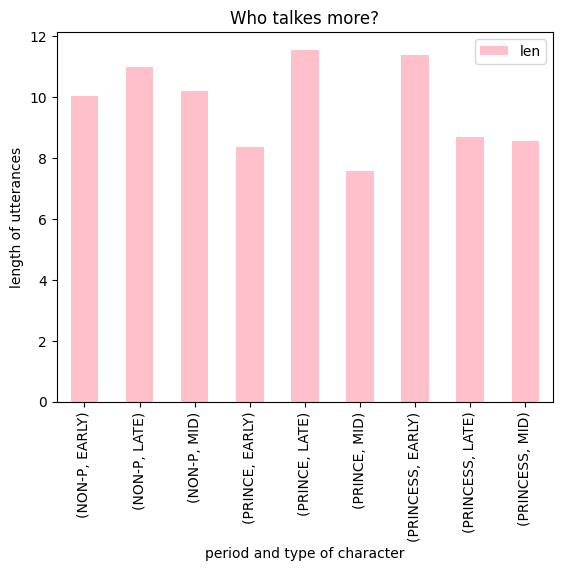

In [37]:
df2.groupby(["Speaker_Status", "Disney_Period"]).agg({"len": "mean"}).plot.bar(color='pink');
plt.title('Who talkes more?')
plt.xlabel('period and type of character')
plt.ylabel('length of utterances');

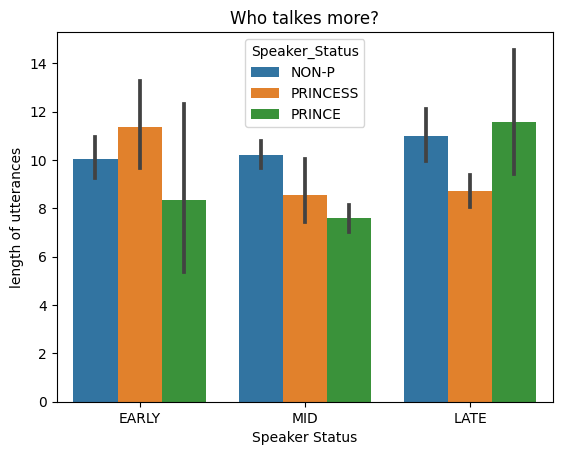

In [38]:
sns.barplot(x="Disney_Period", y="len", hue='Speaker_Status', data=df2)
plt.title('Who talkes more?')
plt.xlabel('Speaker Status')
plt.ylabel('length of utterances');



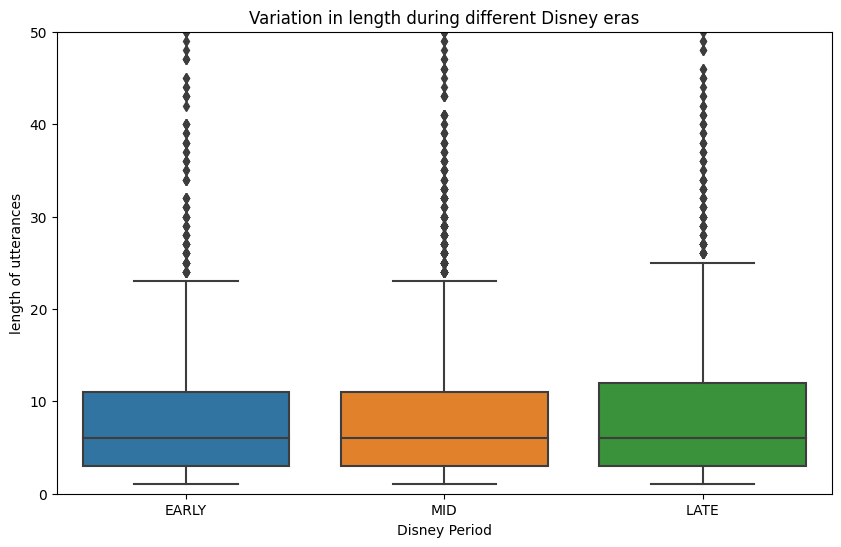

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Disney_Period", y="len", data=df2)
plt.ylim((0, 50))
plt.title('Variation in length during different Disney eras')
plt.ylabel('length of utterances')
plt.xlabel('Disney Period');

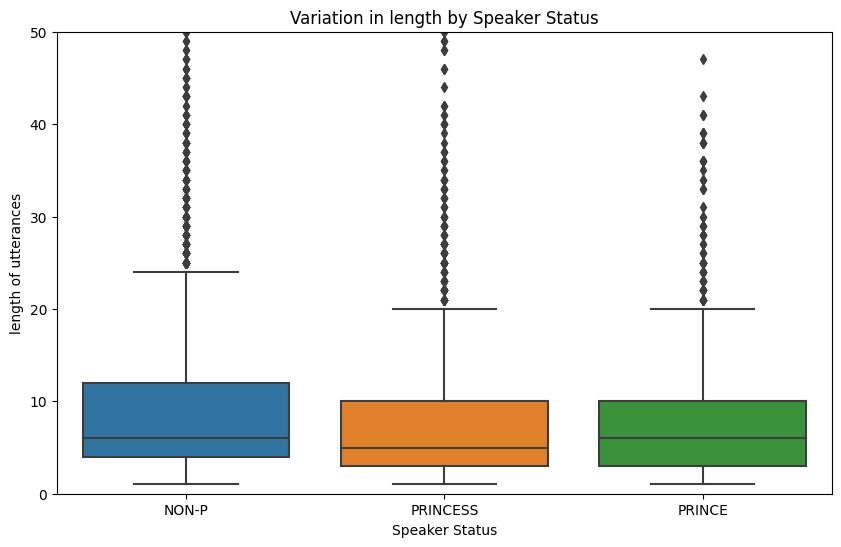

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Speaker_Status", y="len", data=df2)
plt.ylim((0, 50))
plt.title('Variation in length by Speaker Status')
plt.ylabel('length of utterances')
plt.xlabel('Speaker Status');